<h1 style="text-align:center">Applied Data Science</h1>
<h3 style="text-align:center">Logistic Regression in Python: Titanic Project on Kaggle</h3>
By: Rami Azmi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings('ignore')

i = 0

## Data Loading

In [2]:
df_train = pd.read_csv("titanic/titanic_train.csv")
df_test = pd.read_csv("titanic/titanic_test.csv")

## Dataset description and Data correlation
As seen in the code cells of this section, the correlation among the variables of the Training dataset is shown in the following heatmap below. It can also be seen that there are some missings in some features such as Age and Cabin. The Cabin column had considerable amoun of null values, in addition, it seems that there is no significance of training our data using this feature. The <b>Age</b> column, for example, only counts 714 rows whereas all the other features have 891 rows (Age: 891 - 714 = 177).

### Data Correlation

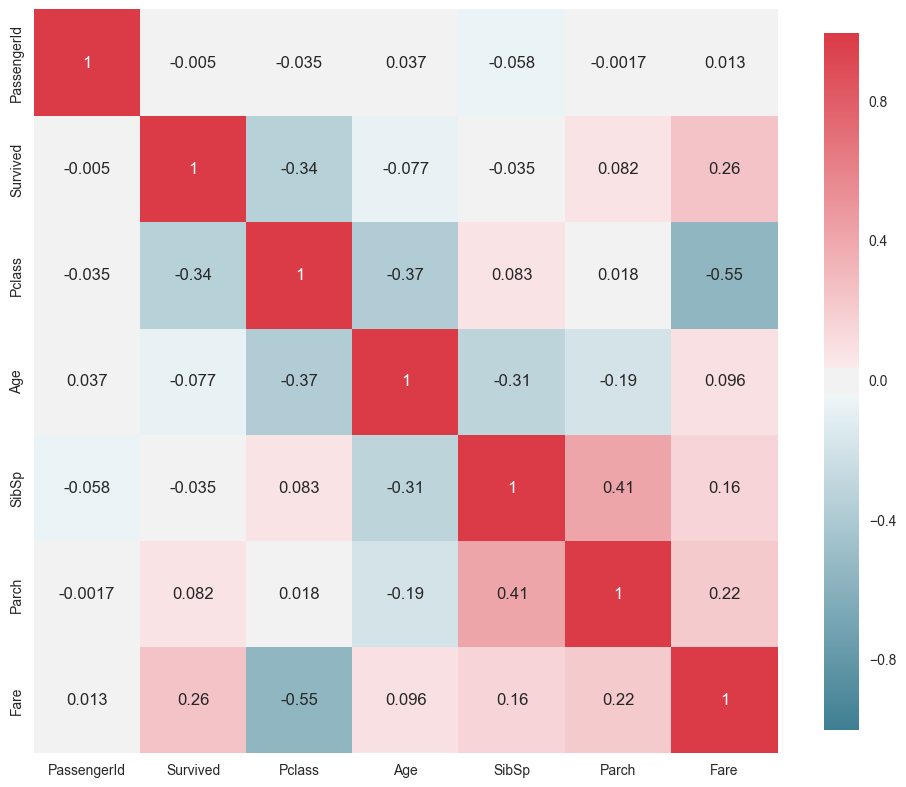

In [3]:
import seaborn as sns
corr = df_train.corr()
_ , ax = plt.subplots( figsize =( 12 , 10 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
_ = sns.heatmap(corr,cmap = cmap,square=True,cbar_kws={ 'shrink' : .9 },ax=ax,annot = True,annot_kws = { 'fontsize' : 12 })

In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Data imputation
As shown in the code above shows that there are missings of some features. Importantly, there is an issue that could affect the predition model, and so, there are two approaches; the <b>Age</b> column could be removed, but the more data is the better, therefore, the null values of the <B>Age</B> column will be imputed by either the following two different methods:
<ol>
    <li>Calculating the mean grouping data according the <b>Pclass</b> feature.</li>
    <li>Predicting the missing values of the <b>Age</b> coulmn using <b>Linear Regression Model</b>. </li>
</ol>

### Method 1

In [6]:
df_train_1 = df_train
df_test_1 = df_test

In [7]:
def impute_age(p_age,p_class):
    if (p_class == 1):
        v_out = 37
    elif p_class == 2:
        v_out = 29
    else:
        v_out = 24
    return v_out

In [8]:
# Impute Training set
for i in range(len(df_train_1.Age)):
    if np.isnan(df_train_1.Age[i]):
        df_train_1.Age[i] = impute_age(df_train_1.Age[i], df_train_1.Pclass[i])

#Impute Test set
for i in range(len(df_test_1.Age)):
    if np.isnan(df_test_1.Age[i]):
        df_test_1.Age[i] = impute_age(df_test_1.Age[i], df_test_1.Pclass[i])

In [9]:
df_train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Logistic Regression Modeling

In [10]:
# This piece of code is to factor some features; convert chacter categories into numerical.

# Training set
df_train_1.loc[df_train_1["Sex"] == "male", "Sex"] = 0
df_train_1.loc[df_train_1["Sex"] == "female", "Sex"] = 1

# we use 'S' according to: df_train_1.describe()   df_train_1.isnull().sum()
df_train_1["Embarked"] = df_train_1["Embarked"].fillna('S') 

df_train_1.loc[df_train_1["Embarked"] == "S", "Embarked"] = 0
df_train_1.loc[df_train_1["Embarked"] == "C", "Embarked"] = 1
df_train_1.loc[df_train_1["Embarked"] == "Q", "Embarked"] = 2

### Data Splitting
By viewing the test set; <b>df_test</b>, it can be seen that the data is not labeled, and therefore, data will be splitted randomly using the <b>df_train_1</b> set. However, the test dataset <b>titanic_test.csv</b> will be altered adding <b>Survived</b> column on purpose of submission results to <b>Kaggle</b>.

In [11]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"] #Significant features

from sklearn.cross_validation import train_test_split
# Split the data into Trainging and Testing sets
X = df_train_1.drop('Survived',1)
X_train, X_test, Y_train, Y_test = train_test_split(X, df_train_1["Survived"], random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(668, 11) (223, 11) (668,) (223,)


In [12]:
model_1 = LogisticRegression(random_state=1)


# fitting using Training set
model_1.fit(X_train[features], Y_train)
print(features, model_1.coef_)

# predition using Testing set
predictions = model_1.predict(X_test[features])

df_results_1 = pd.DataFrame({
        "PassengerId": X_test["PassengerId"],
        "Survived (Actual)": Y_test,
        "Survived (Predicted)": predictions
    })

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'] [[-0.90655797  2.54385748 -0.03077819 -0.27795664 -0.10979943  0.00458975
   0.20272025]]


In [13]:
print('Precision: ',model_1.score(X_test[features], Y_test))
print('Precision: ',(1-len(df_results_1[df_results_1["Survived (Actual)"]!=df_results_1["Survived (Predicted)"]])/len(X_test)))

Precision:  0.80269058296
Precision:  0.8026905829596412


### Method 2

In [14]:
df_train = pd.read_csv("titanic/titanic_train.csv")

In [15]:
# This piece of code is to factor some features; convert chacter categories into numerical.

df_train.loc[df_train["Sex"] == "male", "Sex"] = 0
df_train.loc[df_train["Sex"] == "female", "Sex"] = 1

# we use 'S' according to: df_train_1.describe()   df_train_1.isnull().sum()
df_train["Embarked"] = df_train["Embarked"].fillna('S') 

df_train.loc[df_train["Embarked"] == "S", "Embarked"] = 0
df_train.loc[df_train["Embarked"] == "C", "Embarked"] = 1
df_train.loc[df_train["Embarked"] == "Q", "Embarked"] = 2

The Training dataset will be divided into two subsets; one of them for the observations that contain missing ages.

In [16]:
df_train['Age'].fillna(0, inplace=True)
df_train_withAge = df_train[df_train.Age != 0][['PassengerId','Survived','Pclass','Sex','SibSp','Parch','Fare','Embarked','Age']]
df_train_nullAge = df_train[df_train.Age == 0][['PassengerId','Survived','Pclass','Sex','SibSp','Parch','Fare','Embarked']]
print(len(df_train_withAge),len(df_train_nullAge))

714 177


By viewing the <b>Age</b> variable values; using the next code below, it is needed to predict a continuous variable, and so, a linear regression model will be employed to impurte the missings.

In [17]:
# This code is to show that the ages are viewed as continuous data
df_train_withAge.Age.unique()

array([ 22.  ,  38.  ,  26.  ,  35.  ,  54.  ,   2.  ,  27.  ,  14.  ,
         4.  ,  58.  ,  20.  ,  39.  ,  55.  ,  31.  ,  34.  ,  15.  ,
        28.  ,   8.  ,  19.  ,  40.  ,  66.  ,  42.  ,  21.  ,  18.  ,
         3.  ,   7.  ,  49.  ,  29.  ,  65.  ,  28.5 ,   5.  ,  11.  ,
        45.  ,  17.  ,  32.  ,  16.  ,  25.  ,   0.83,  30.  ,  33.  ,
        23.  ,  24.  ,  46.  ,  59.  ,  71.  ,  37.  ,  47.  ,  14.5 ,
        70.5 ,  32.5 ,  12.  ,   9.  ,  36.5 ,  51.  ,  55.5 ,  40.5 ,
        44.  ,   1.  ,  61.  ,  56.  ,  50.  ,  36.  ,  45.5 ,  20.5 ,
        62.  ,  41.  ,  52.  ,  63.  ,  23.5 ,   0.92,  43.  ,  60.  ,
        10.  ,  64.  ,  13.  ,  48.  ,   0.75,  53.  ,  57.  ,  80.  ,
        70.  ,  24.5 ,   6.  ,   0.67,  30.5 ,   0.42,  34.5 ,  74.  ])

In [18]:
lreg = LinearRegression()
# Data Columns
X = df_train_withAge.drop('Age',1)

# Targets
Y_target = df_train_withAge.Age

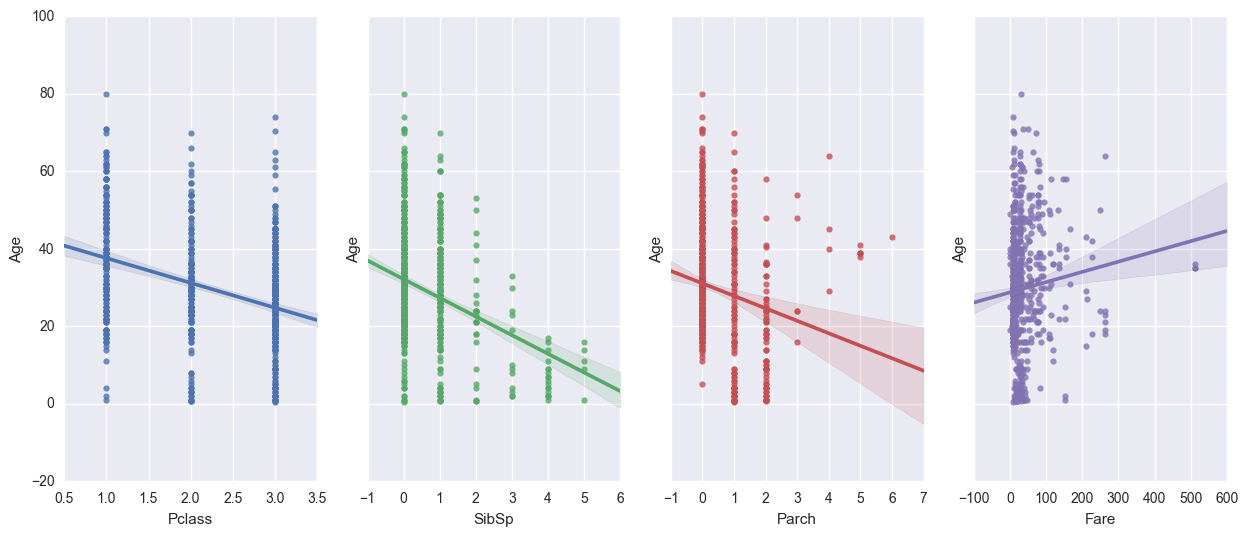

In [19]:
columns = ["Pclass","SibSp", "Parch", "Fare"]
fig, axs = plt.subplots(ncols=4, figsize = (15, 6), sharey=True)
for i, column in enumerate(columns):
    _ = sns.regplot(column,'Age',data = df_train_withAge, ax=axs[i])

In [20]:
lreg.fit(X,Y_target)

coeff_df = pd.DataFrame(df_train_withAge.columns)
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)
print(coeff_df)


df_train_nullAge['Age'] = lreg.predict(df_train_nullAge).round()

      Features  Coefficient Estimate
0  PassengerId              0.000360
1     Survived             -6.935809
2       Pclass             -8.034686
3          Sex              0.309373
4        SibSp             -3.992040
5        Parch             -0.829984
6         Fare             -0.014741
7     Embarked             -0.136389
8          Age                   NaN


Linear Regression Model Evaluation


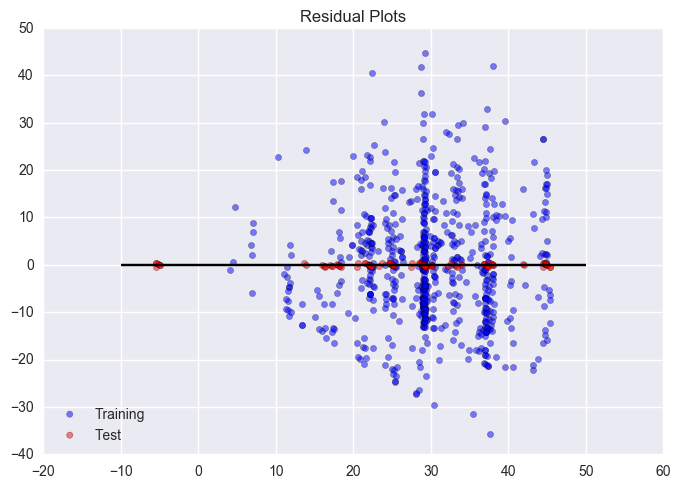

In [21]:
print('Linear Regression Model Evaluation')
pred_train = lreg.predict(X)
pred_test = lreg.predict(df_train_nullAge.drop('Age',1))

# Scatter plot the training data
train = plt.scatter(pred_train,(df_train_withAge.Age-pred_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(df_train_nullAge.Age-pred_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

# Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

### Logistic Regression Modeling

In [22]:
df_train_2 = df_train_withAge.append(df_train_nullAge, ignore_index=True)
len(df_train_2[df_train_2.Age < 0])
df_train_2.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
0,1,0,3,0,1,0,7.2500,0,22.0
1,2,1,1,1,1,0,71.2833,1,38.0
2,3,1,3,1,0,0,7.9250,0,26.0
3,4,1,1,1,1,0,53.1000,0,35.0
4,5,0,3,0,0,0,8.0500,0,35.0


In [23]:
# Impute negative ages
for i in range(len(df_train_2.Age)):
    if df_train_2.Age[i] <0:
        df_train_2.Age[i] = impute_age(df_train_2.Age[i], df_train_2.Pclass[i])

### Data splitting

In [24]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"] #Significant features

from sklearn.cross_validation import train_test_split

# Split the data into Trainging and Testing sets
X = df_train_2.drop('Survived',1)
X_train, X_test, Y_train, Y_test = train_test_split(X, df_train_2["Survived"], random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(668, 8) (223, 8) (668,) (223,)


In [25]:
model_2 = LogisticRegression(random_state=1)


# fitting using Training set
model_2.fit(X_train[features], Y_train)
print(features, model_2.coef_)

# predition using Testing set
predictions = model_2.predict(X_test[features])

df_results_2 = pd.DataFrame({
        "PassengerId": X_test["PassengerId"],
        "Survived (Actual)": Y_test,
        "Survived (Predicted)": predictions
    })


['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'] [[-1.05612269  2.52277793 -0.04335305 -0.43831276  0.00475277  0.0037761
   0.07883733]]


### Model Validation 
Validation using "Confusion Matrix"

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

print('Precision: ',model_2.score(X_test[features], Y_test))
print('Precision: ',(1-len(df_results_2[df_results_2["Survived (Actual)"]!=df_results_2["Survived (Predicted)"]])/len(X_test)))

Precision:  0.816143497758
Precision:  0.8161434977578476


### Results discussion

By comparing the two methods, it can be seen that there is a slight improvement in accuracy. However, some ages have not assigned with proper values using linear regression. According to the precision resuled by <b>Method 2</b> the <b>Survived</b> taget of the Test dataset will be predicted using <b>model_2</b> logistic regression.

In [27]:
# Test set
df_test_1.loc[df_test_1["Sex"] == "male", "Sex"] = 0
df_test_1.loc[df_test_1["Sex"] == "female", "Sex"] = 1
df_test_1.loc[df_test_1["Embarked"] == "S", "Embarked"] = 0
df_test_1.loc[df_test_1["Embarked"] == "C", "Embarked"] = 1
df_test_1.loc[df_test_1["Embarked"] == "Q", "Embarked"] = 2
df_test_1["Fare"] = df_test_1["Fare"].fillna(df_test_1["Fare"].median()) # There is only one null value in Fare column

In [28]:
pred_submission = model_2.predict(df_test_1[features])
df_submission = pd.DataFrame({
        "PassengerId": df_test_1["PassengerId"],
        "Survived": pred_submission
    })
df_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [29]:
df_submission.to_csv( 'test_pred.csv' , index = False )